In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('results2.CSV')

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [5]:
data.drop(columns=['bib','ctz','name','state'], inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
25k,16163,3245,-,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,16163,NaN,NaN,NaN,41.6378,10.3514,18,34,42,49,80
division,16163,NaN,NaN,NaN,1100.96,942.144,1,363,842,1560,3834
10k,16163,1459,49.15,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,16163,2,M,9679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
half,16163,2761,105.53,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
official,16163,NaN,NaN,NaN,208.159,23.7441,85.53,191.725,209.22,225.23,284.23
country,16163,68,USA,13167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,16163,NaN,NaN,NaN,8429.15,5052.1,1,4061.5,8247,12662.5,17598
pace,16163,NaN,NaN,NaN,7.94736,0.905757,3.27,7.32,7.98,8.6,10.85


## One-hot encode and Normalize ##

In [6]:
df1 = pd.get_dummies(data.gender, drop_first=True)
df2 = pd.get_dummies(data.city, drop_first=True)
df3 = pd.get_dummies(data.country, drop_first=True)

In [7]:
data.drop(columns=['city','gender','country'], inplace=True)

In [8]:
data.replace('-', 0, inplace=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0, 1))
scale.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
X = data.values
X = scale.transform(X)

In [11]:
data = data.join(df1)
data = data.join(df2)
data = data.join(df3)

In [12]:
data.shape

(16163, 4497)

In [13]:
data[['25k','age','division','10k','half','official','overall','pace','30k','5k','genderdiv','20k','35k','40k']] = X

In [14]:
data.head()

25k       age  division       10k      half  official   overall  \
0  0.304792  0.161290  0.002087  0.272645  0.295161  0.027026  0.000455   
1  0.472253  0.193548  0.001044  0.463407  0.468018  0.236387  0.000227   
2  0.472008  0.080645  0.000000  0.463407  0.468162  0.225667  0.000000   
3  0.308642  0.225806  0.001044  0.280894  0.302877  0.014595  0.000227   
4  0.297946  0.338710  0.000522  0.272645  0.292565  0.008505  0.000114   

       pace       30k        5k  genderdiv       20k       35k       40k  M  \
0  0.026385  0.316894  0.267911   0.000751  0.294564  0.325621  0.318741  1   
1  0.237467  0.474652  0.478627   0.000376  0.467051  0.473987  0.464866  1   
2  0.225594  0.473375  0.479530   0.000000  0.467127  0.473551  0.461177  1   
3  0.014512  0.313218  0.270319   0.000376  0.302763  0.318083  0.310842  1   
4  0.007916  0.305917  0.268513   0.000188  0.292666  0.312331  0.305067  1   

   7941 HB Meppel  A P O  APO  Aabenraa  Aachen  Aalborg  Aalborg Sv  \
0               0      0    0         0       0        0           0   
1               0      0    0         0       0        0           0   
2               0      0    0         0       0        0           0   
3               0      0    0         0       0        0           0   
4               0      0    0         0       0        0           0   

   Aarhus C.  Abbeville  Abbotsford  Aberdeen  Abilene  Abingdon  Abington  \
0          0          0           0         0        0         0         0   
1          0          0           0         0        0         0         0   
2          0          0           0         0        0         0         0   
3          0          0           0         0        0         0         0   
4          0          0           0         0        0         0         0   

   Aboyne  Abu Dhabi  Acqui Terme  Acton  Acworth  Ada  Addis Ababa  Adelaide  \
0       0          0            0      0        0    0            0         0   
1       0          0            0      0        0    0            0         0   
2       0          0            0      0        0    0            0         0   
3       0          0            0      0        0    0            0         0   
4       0          0            0      0        0    0            0         0   

   Adlington  Adliswil  Adrian  Adstock  Affoltern  Agassiz  Agua Dulce  \
0          0         0       0        0          0        0           0   
1          0         0       0        0          0        0           0   
2          0         0       0        0          0        0           0   
3          0         0       0        0          0        0           0   
4          0         0       0        0          0        0           0   

   Aibonito  Aichi  Aichi-Pref.  Aiea  Aiken  Ainslie  Airdrie  Aitkin  Ajax  \
0         0      0            0     0      0        0        0       0     0   
1         0      0            0     0      0        0        0       0     0   
2         0      0            0     0      0        0        0       0     0   
3         0      0            0     0      0        0        0       0     0   
4         0      0            0     0      0        0        0       0     0   

   Akron  Alajuela  Alameda  Alamo  Alba  Albany  Albertville  Albion  \
0      0         0        0      0     0       0            0       0   
1      0         0        0      0     0       0            0       0   
2      0         0        0      0     0       0            0       0   
3      0         0        0      0     0       0            0       0   
4      0         0        0      0     0       0            0       0   

   Albuquerqeu  Albuquerque  Albury  Alden  Aldergrove  Aldie  Alexander  \
0            0            0       0      0           0      0          0   
1            0            0       0      0           0      0          0   
2            0            0       0      0           0      0          0   
3            0    

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
kmeans.labels_


array([0, 0, 0, ..., 0, 1, 2])

In [16]:
data['Group'] = kmeans.labels_

In [17]:
data.Group.value_counts()

1    7591
2    5587
0    2985
Name: Group, dtype: int64

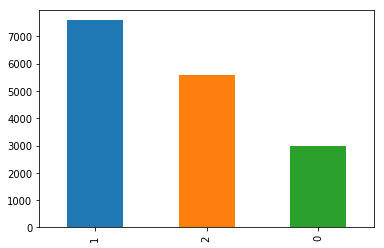

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
data.Group.value_counts().plot(kind='bar')

In [19]:
grouped_data = data.groupby('Group').mean()

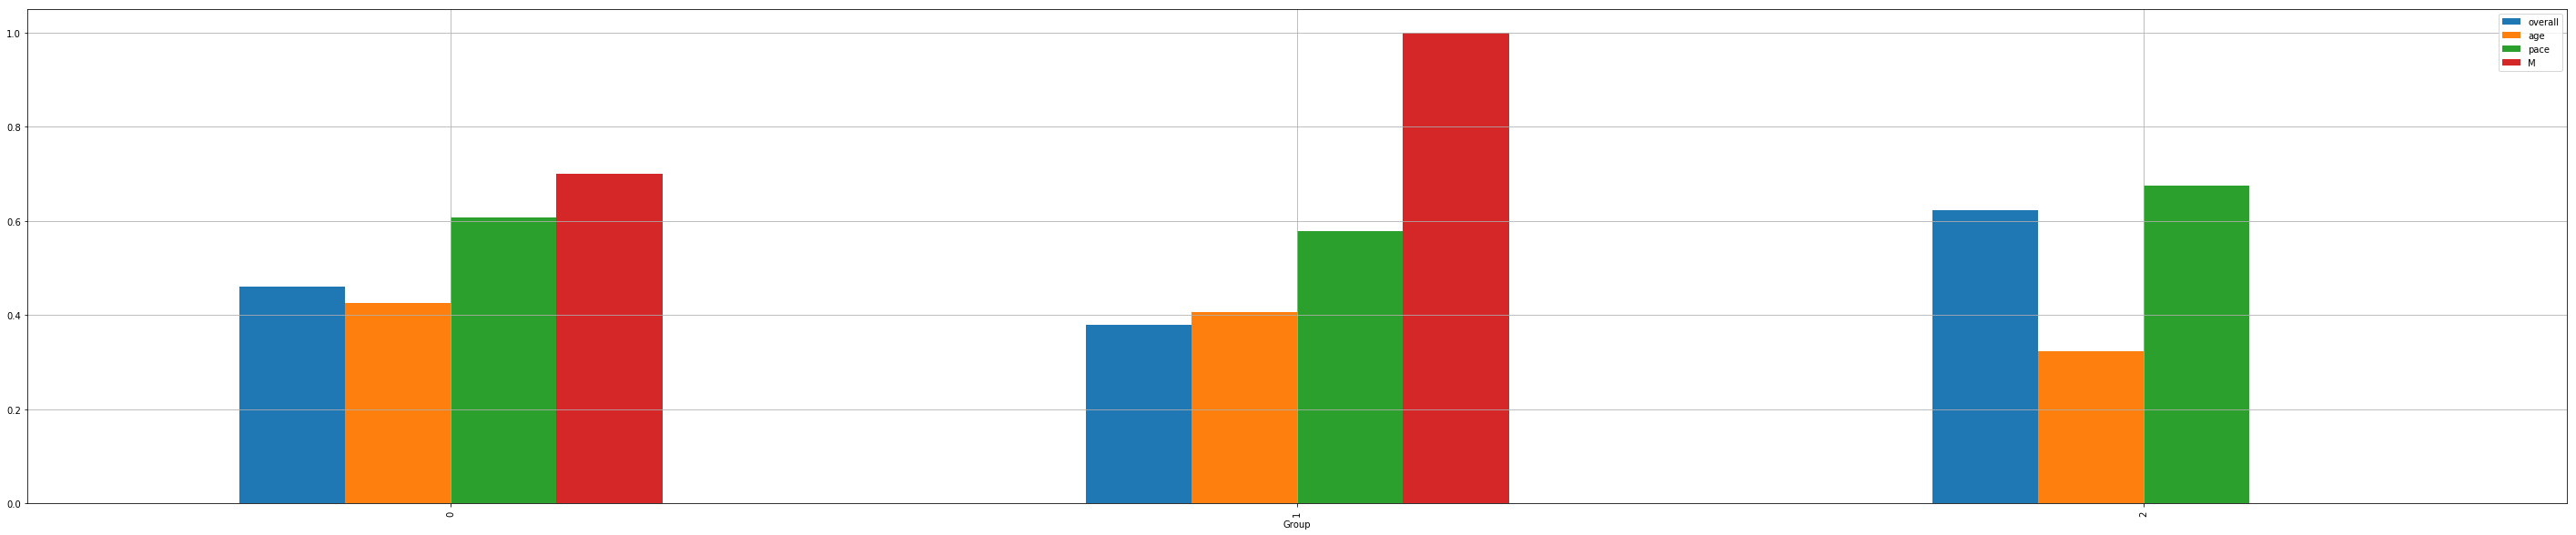

In [20]:
grouped_data[['overall','age','pace','M']].plot.bar(figsize=(50,10), grid=True)

In [24]:
from sklearn.metrics import silhouette_score
df = data.drop(columns=['Group'])
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.14543087476532504
For n_clusters = 3 The average silhouette_score is : 0.14283700494783053
For n_clusters = 4 The average silhouette_score is : 0.1097602916179219
For n_clusters = 5 The average silhouette_score is : 0.12138786138680933
For n_clusters = 6 The average silhouette_score is : 0.09106310357513304
For n_clusters = 7 The average silhouette_score is : 0.09128564628495618
For n_clusters = 8 The average silhouette_score is : 0.06517386496980541
For n_clusters = 9 The average silhouette_score is : 0.06588319634593674
For n_clusters = 10 The average silhouette_score is : 0.06508514268533673
For n_clusters = 11 The average silhouette_score is : 0.05714081208601392
For n_clusters = 12 The average silhouette_score is : 0.057601151605478705
For n_clusters = 13 The average silhouette_score is : 0.04841075737443301
For n_clusters = 14 The average silhouette_score is : 0.0438806238274859
For n_clusters = 15 The average silhouette_scor

Với dữ liệu hiện tại thì cluster không cho ra silhouette_score cao. Đề nghị chọn ra features để thực hiện cluster.

In [41]:
data_2 = data[['age','overall','pace','official','M']]

In [42]:
data_2.head()

,age,overall,pace,official,M
0,0.161290,0.000455,0.026385,0.027026,1
1,0.193548,0.000227,0.237467,0.236387,1
2,0.080645,0.000000,0.225594,0.225667,1
3,0.225806,0.000227,0.014512,0.014595,1
4,0.338710,0.000114,0.007916,0.008505,1


In [56]:
sse = []
for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sse.append(clusterer.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.72578163763676
For n_clusters = 3 The average silhouette_score is : 0.6110216953506947
For n_clusters = 4 The average silhouette_score is : 0.4957329972162728
For n_clusters = 5 The average silhouette_score is : 0.4405245636909226
For n_clusters = 6 The average silhouette_score is : 0.4071101875457076
For n_clusters = 7 The average silhouette_score is : 0.3691928002843902
For n_clusters = 8 The average silhouette_score is : 0.3680536856472377
For n_clusters = 9 The average silhouette_score is : 0.343815449449611
For n_clusters = 10 The average silhouette_score is : 0.3536377738655277
For n_clusters = 11 The average silhouette_score is : 0.34833416023039004
For n_clusters = 12 The average silhouette_score is : 0.3504311884974494
For n_clusters = 13 The average silhouette_score is : 0.35216545277517436
For n_clusters = 14 The average silhouette_score is : 0.3406579549732306


In [45]:
clusterer=KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(data_2)
data_2['grouped'] = cluster_labels

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
data_2['grouped'].value_counts()

0    9679
1    6484
Name: grouped, dtype: int64

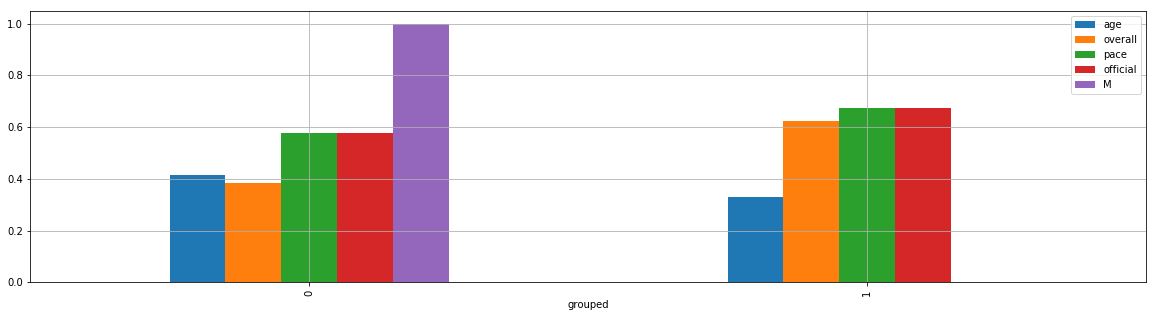

In [54]:
grouped_data_2 = data_2.groupby('grouped').mean()
grouped_data_2.plot.bar(figsize=(20,5), grid=True)

Đây rõ ràng là 2 nhóm nam và nữ với class 0 là nhóm nam và class 1 là nhóm nữ.
Có thể thấy nhóm nam có tuổi trung bình cao hơn nữ và thành tích tốt hơn nữ với hạng cao hơn (thấp hơn) và thời gian hoàn thành (offcial) nhỏ hơn nhóm nữ.

### Sử dụng Elbow method để xác định số lượng cluster: ###

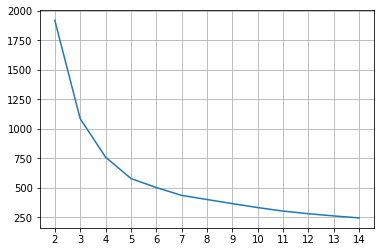

In [63]:
plt.plot(np.arange(2, 15, step=1),sse)
plt.xticks(np.arange(2, 15, step=1))
plt.grid()

Ta thấy ở k=5 thì plot thay đổi độ dốc nhanh, chọn k=5.

In [64]:
clusterer=KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(data_2)
data_2['grouped'] = cluster_labels
data_2['grouped'].value_counts()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    3916
1    3500
2    3434
3    2984
4    2329
Name: grouped, dtype: int64

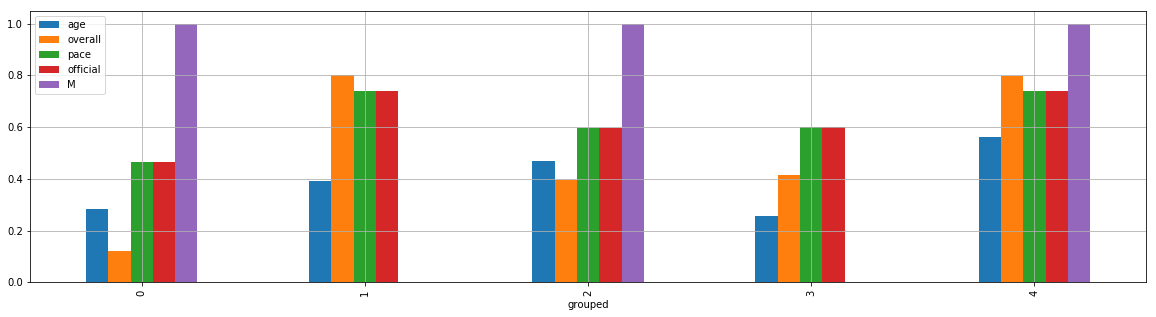

In [66]:
grouped_data_2 = data_2.groupby('grouped').mean()
grouped_data_2.plot.bar(figsize=(20,5), grid=True)

Trong 5 nhóm được clustered, 3 nhóm nam và 2 nhóm nữ, có thể đoán 5 đó là:
+ 0: nhóm Nam, trẻ (age), thành tích (overall, official) tốt với tốc độ (pace) nhanh. 
+ 1: nhóm Nữ, độ tuổi trung bình, thành tích kém
+ 2: nhóm Nam, độ tuổi trung bình, thành tích trung bình không bằng nhóm 0.
+ 3: nhóm Nữ, trẻ, thành tích tốt nhất trong những nhóm Nữ
+ 4: nhóm Nam, lớn tuổi, thành tích kém

Có thể thấy 2 yếu tố ảnh hưởng rõ rệt đến thành tích là *Age* và *Gender*.
+ Nam có thành tích tốt hơn nữ
+ Người trẻ có thành tích tốt hơn người già

In [69]:
X = scale.inverse_transform(X)

In [70]:
data[['25k','age','division','10k','half','official','overall','pace','30k','5k','genderdiv','20k','35k','40k']] = X

In [71]:
data.head()

25k   age  division    10k   half  official  overall  pace    30k     5k  \
0  49.87  28.0       9.0  18.18  40.93     90.90      9.0  3.47  62.07   8.90   
1  77.27  30.0       5.0  30.90  64.90    132.50      5.0  5.07  92.97  15.90   
2  77.23  23.0       1.0  30.90  64.92    130.37      1.0  4.98  92.72  15.93   
3  50.50  32.0       5.0  18.73  42.00     88.43      5.0  3.38  61.35   8.98   
4  48.75  39.0       3.0  18.18  40.57     87.22      3.0  3.33  59.92   8.92   

   genderdiv    20k     35k     40k  M  7941 HB Meppel  A P O  APO  Aabenraa  \
0        9.0  38.80   74.73   85.55  1               0      0    0         0   
1        5.0  61.52  108.78  124.77  1               0      0    0         0   
2        1.0  61.53  108.68  123.78  1               0      0    0         0   
3        5.0  39.88   73.00   83.43  1               0      0    0         0   
4        3.0  38.55   71.68   81.88  1               0      0    0         0   

   Aachen  Aalborg  Aalborg Sv  Aarhus C.  Abbeville  Abbotsford  Aberdeen  \
0       0        0           0          0          0           0         0   
1       0        0           0          0          0           0         0   
2       0        0           0          0          0           0         0   
3       0        0           0          0          0           0         0   
4       0        0           0          0          0           0         0   

   Abilene  Abingdon  Abington  Aboyne  Abu Dhabi  Acqui Terme  Acton  \
0        0         0         0       0          0            0      0   
1        0         0         0       0          0            0      0   
2        0         0         0       0          0            0      0   
3        0         0         0       0          0            0      0   
4        0         0         0       0          0            0      0   

   Acworth  Ada  Addis Ababa  Adelaide  Adlington  Adliswil  Adrian  Adstock  \
0        0    0            0         0          0         0       0        0   
1        0    0            0         0          0         0       0        0   
2        0    0            0         0          0         0       0        0   
3        0    0            0         0          0         0       0        0   
4        0    0            0         0          0         0       0        0   

   Affoltern  Agassiz  Agua Dulce  Aibonito  Aichi  Aichi-Pref.  Aiea  Aiken  \
0          0        0           0         0      0            0     0      0   
1          0        0           0         0      0            0     0      0   
2          0        0           0         0      0            0     0      0   
3          0        0           0         0      0            0     0      0   
4          0        0           0         0      0            0     0      0   

   Ainslie  Airdrie  Aitkin  Ajax  Akron  Alajuela  Alameda  Alamo  Alba  \
0        0        0       0     0      0         0        0      0     0   
1        0        0       0     0      0         0        0      0     0   
2        0        0       0     0      0         0        0      0     0   
3        0        0       0     0      0         0        0      0     0   
4        0        0       0     0      0         0        0      0     0   

   Albany  Albertville  Albion  Albuquerqeu  Albuquerque  Albury  Alden  \
0       0            0       0            0            0       0      0   
1       0            0       0            0            0       0      0   
2       0            0       0            0            0       0      0   
3       0            0       0            0            0       0      0   
4       0            0       0            0            0       0      0   

   Aldergrove  Aldie  Alexander  Alexandra  Alexandria  Alfred  Algodones  \
0           0      0          0          0           0       0          0   
1           0      0          0          0           0       0          0   
2           0      0        

In [82]:
data_2 = data[['age','division','official','overall','pace','genderdiv','M']]
data_2['grouped'] = cluster_labels
grouped_data_2 = data_2.groupby('grouped').mean()
grouped_data_2.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,division,official,overall,pace,genderdiv,M
grouped,,,,,,,
0,35.563330,976.386619,178.028309,2167.482635,6.797955,1989.836568,1
1,42.343714,1431.572286,232.187051,14070.416571,8.863837,4962.148286,0
2,46.964473,1012.958066,204.165978,6993.192487,7.795131,5635.658416,1
3,34.005362,944.873995,204.908083,7328.519102,7.823422,1565.820040,0
4,52.715328,1143.342207,232.761644,14007.372263,8.885981,9080.060541,1


Đây là dữ liệu trung bình của 5 nhóm đã cluster.
+ Nhóm 1: Nam, độ tuổi khoảng 35, tốc độ chạy và thành tích là cao vượt trội so với những nhóm nam khác.
+ Nhóm 3: Nam, độ tuổi khoảng 46, tốc độ chạy và thành tích đứng thứ 2 trong 3 nhóm nam
+ Nhóm 5: Nam, độ tuổi khoảng 52, tốc độ chạy và thành tích thấp hơn rất đáng kể so với 2 nhóm nam còn lại
+ Nhóm 2: Nữ, độ tuổi khoảng 42, tốc độ chạy và thành tích thấp hơn so với nhóm nữ 3 ở độ tuổi 34

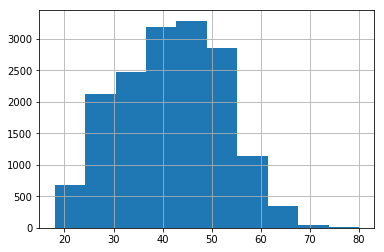

In [76]:
data.age.hist()

Người ở độ tuổi 40-50 tuổi tham gia cuộc thi đông nhất. Theo histogram thì cuộc thi này đa số người từ 25-55 tuổi tham gia.

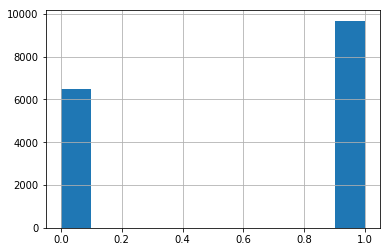

In [77]:
data.M.hist()

Nam tham gia nhiều hơn nữ gấp rưỡi.